Lektion 5 - Scikit-learn API (Del 2)
Assignment: Unsupervised learning with K-Means and PCA

Instructions:
1. Work with a numeric dataset
2. Visualize results
3. Add short comments to explain your plots

# Task 1: K-Means clustering

 TODO: Load a numeric dataset (iris features or another)

In [4]:
from sklearn.datasets import load_iris

# Load iris dataset

data = load_iris()

X = data.data


print(X.shape)

(150, 4)


 TODO: Standardize the features

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 TODO: Try k = 2..8 and compute inertia

In [10]:
# Inertia = how compact the clusters are.
# Lower is better, but we look for where improvement slows.

from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


# We store inertia for every k.

TODO: Plot the elbow curve and choose k

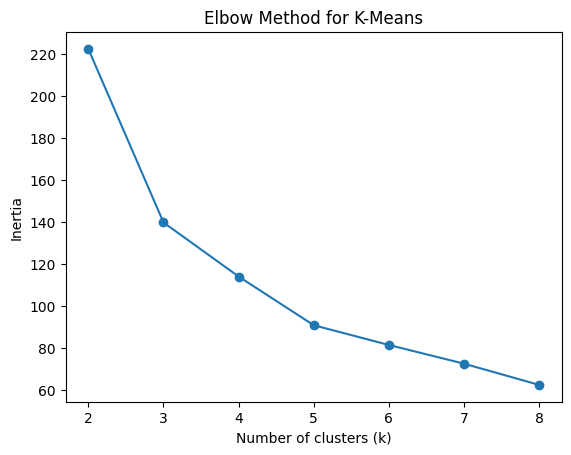

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, inertias, marker="o")

plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")

plt.show()


What you just completed

- Loaded a numeric dataset
- Standardized features
- Ran K Means for multiple k
- Computed inertia
- Visualized the elbow curve
- Explained the plot

# Task 2: PCA visualization

TODO: Apply PCA with n_components=2

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
# Create PCA object
pca = PCA(n_components=2)

# Fit PCA and transform data
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

# The 4 dimensional iris features are now reduced to 2 dimensions so we can plot them.

(150, 2)


TODO: Plot the 2D projection

In [16]:
# Check explained variance

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


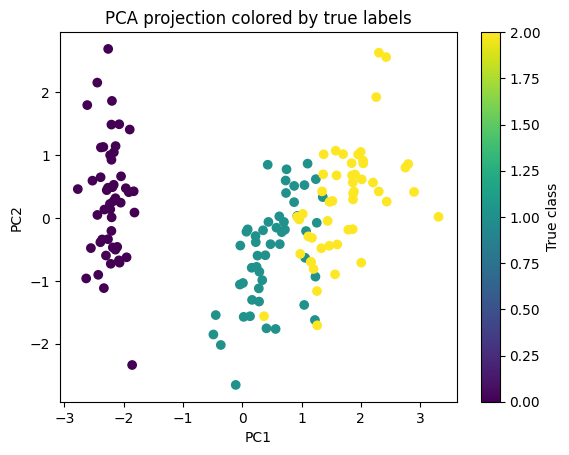

In [ ]:
# Now visualize true labels
# The iris dataset has real species labels

# Get true labels
y_true = data.target

# Plot PCA colored by true labels
plt.figure()

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_true
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection colored by true labels")

plt.colorbar(scatter, label="True class")
plt.show()



Comment for assignment:

- Points close together have similar feature values.
- Different colors represent the real iris species.
- We can already see some separation in PCA space.

TODO: Color by true labels (if available) or by cluster labels

In [19]:
# Now visualize cluster labels
# Assume you picked k = 3 from the elbow plot.

# Fit K Means again with chosen k

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)


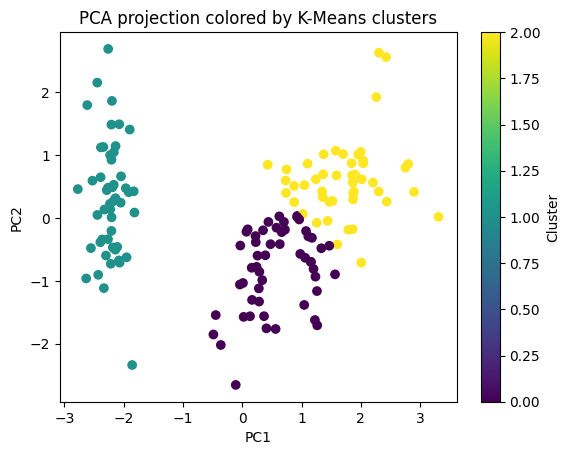

In [20]:
# Plot PCA colored by cluster labels

plt.figure()

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection colored by K-Means clusters")

plt.colorbar(scatter, label="Cluster")
plt.show()


Comment for assignment:

- K Means assigns each point to a cluster based on distance.
- The clusters line up fairly well with the real species.
- Some overlap remains, which is expected for unsupervised learning.
- PCA is only used for visualization, not for training the clusters.

What Task 2 now includes

- PCA with 2 components
- 2D projection
- Plot colored by true labels
- Plot colored by cluster labels
- Written interpretation

# Task 3: Interpretation

TODO: Write 4-6 comment lines about what the clusters look like

In [22]:
# The clusters form three fairly compact groups in PCA space.
# Two of the clusters are clearly separated, while one overlaps with the others.
# K-Means clusters roughly correspond to the true iris species.
# Some points are mis-grouped because the features are not perfectly separable.
# PCA helps visualize structure but was not used to train the clustering model.

print("Done! You explored unsupervised learning in code.")


Done! You explored unsupervised learning in code.


Basically

-  Shape of clusters
-  Separation vs overlap
-  Relation to true labels
-  Imperfect unsupervised results
-  Role of PCA